In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

## Downloading the Data

In [2]:
## downloading cvs of created data
import pandas as pd

train_df = pd.read_csv('train.csv', sep=',')
val_df = pd.read_csv('dev.csv', sep=',')
test_df = pd.read_csv('test.csv', sep=',')
train_df.drop(['Unnamed: 0'], axis=1, inplace=True)
val_df.drop(['Unnamed: 0'], axis=1, inplace=True)
test_df.drop(['Unnamed: 0'], axis=1, inplace=True)
display(train_df)
display(val_df)
display(test_df)

,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,country_id
0,1.585008e+09,-0.194338,-0.196817,-0.199902,0.007391,-0.226347,-0.239105,-0.526424,0.300057,-0.250378,...,0.007324,-0.001390,0.892317,-0.046508,0.025368,-0.062867,-0.029765,0.334627,-0.050679,0.0
1,1.585094e+09,-0.194326,-0.197407,-0.199757,0.007391,-0.226347,-0.239105,-0.517723,0.077947,-0.175102,...,0.007324,-0.001390,0.892317,-0.046508,0.025368,-0.062867,-0.029765,0.334627,-0.050679,0.0
2,1.585181e+09,-0.194321,-0.197997,-0.199698,0.007391,-0.226347,-0.239105,-0.514243,-0.144154,-0.144996,...,0.007324,-0.001390,0.892317,-0.046508,0.025368,-0.062867,-0.029765,0.334627,-0.050679,0.0
3,1.585267e+09,-0.194298,-0.196620,-0.199495,0.007391,-0.226347,-0.239105,-0.498581,0.374090,-0.039625,...,0.007324,-0.001390,0.892317,-0.046508,0.025368,-0.062867,-0.029765,0.334627,-0.050679,0.0
4,1.585354e+09,-0.194298,-0.198390,-0.199495,0.007391,-0.226347,-0.239105,-0.498581,-0.292229,-0.039625,...,0.007324,-0.001390,0.892317,-0.046508,0.025368,-0.062867,-0.029765,0.334627,-0.050679,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32798,1.603930e+09,-0.173515,-0.197407,-0.197138,-0.268163,-0.226347,-0.231169,-0.443301,-0.289573,-0.389556,...,0.500864,0.474597,-1.478607,-1.049477,-0.150829,-0.749497,-0.617704,-1.686571,-1.290717,212.0
32799,1.604016e+09,-0.173442,-0.192687,-0.197080,-0.268163,-0.226347,-0.231169,-0.442939,-0.276807,-0.389343,...,0.500864,0.474597,-1.478607,-1.049477,-0.150829,-0.749497,-0.617704,-1.686571,-1.290717,212.0
32800,1.604102e+09,-0.173409,-0.195833,-0.197138,-0.268163,-0.226347,-0.231169,-0.442776,-0.285313,-0.389556,...,0.500864,0.474597,-1.478607,-1.049477,-0.150829,-0.749497,-0.617704,-1.686571,-1.290717,212.0
32801,1.604189e+09,-0.173409,-0.198390,-0.197487,-0.268163,-0.226347,-0.231169,-0.442776,-0.292229,-0.390850,...,0.500864,0.474597,-1.478607,-1.049477,-0.150829,-0.749497,-0.617704,-1.686571,-1.290717,212.0


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,country_id
0,1.585008e+09,-0.194035,-0.194457,-0.196731,0.007391,-0.226347,-0.239105,-0.227485,1.753848,2.074420,...,0.007324,-1.344575,0.009268,2.049378,0.507886,-0.062867,-0.029765,1.350689,0.984488,5.0
1,1.585094e+09,-0.193957,-0.192294,-0.195829,0.007391,-0.226347,-0.239105,-0.152940,2.879199,2.719257,...,0.007324,-1.344575,0.009268,2.049378,0.507886,-0.062867,-0.029765,1.350689,0.984488,5.0
2,1.585181e+09,-0.193897,-0.193670,-0.196266,0.007391,-0.226347,-0.239105,-0.095228,2.163065,2.407239,...,0.007324,-1.344575,0.009268,2.049378,0.507886,-0.062867,-0.029765,1.350689,0.984488,5.0
3,1.585267e+09,-0.193807,-0.191310,-0.195858,-0.289542,-0.200283,-0.235132,-0.008660,3.390716,2.698455,...,0.007324,-1.344575,0.009268,2.049378,0.507886,-0.062867,-0.029765,1.350689,0.984488,5.0
4,1.585354e+09,-0.193699,-0.189934,-0.194607,-0.289542,-0.226347,-0.235132,0.094741,4.106842,3.592893,...,0.007324,-1.344575,0.009268,2.049378,0.507886,-0.062867,-0.029765,1.350689,0.984488,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,1.603930e+09,-0.147683,-0.143129,-0.160540,-0.229609,-0.191594,-0.217937,1.243207,0.856985,0.732488,...,-0.837763,-0.001390,0.035072,-0.046508,0.025368,-0.062867,-0.029765,-0.042196,-0.050679,208.0
9317,1.604016e+09,-0.146971,-0.142539,-0.156904,-0.229519,-0.217659,-0.216613,1.270508,0.869253,0.836441,...,-0.837763,-0.001390,0.035072,-0.046508,0.025368,-0.062867,-0.029765,-0.042196,-0.050679,208.0
9318,1.604102e+09,-0.145923,-0.116187,-0.149659,-0.229161,-0.191594,-0.213974,1.310690,1.417274,1.043493,...,-0.837763,-0.001390,0.035072,-0.046508,0.025368,-0.062867,-0.029765,-0.042196,-0.050679,208.0
9319,1.604189e+09,-0.144635,-0.097307,-0.139535,-0.228893,-0.200283,-0.212649,1.360101,1.809891,1.332875,...,-0.837763,-0.001390,0.035072,-0.046508,0.025368,-0.062867,-0.029765,-0.042196,-0.050679,208.0


,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,country_id
0,1.585008e+09,-0.194358,-0.198390,-0.200106,0.007391,-0.226347,-0.239105,-0.547153,-0.292229,-0.399907,...,0.007324,1.645330,-0.443143,-0.046508,0.025368,-1.765132,-0.931125,-2.807790,-2.474105,32.0
1,1.585094e+09,-0.194358,-0.198390,-0.200106,0.007391,-0.226347,-0.239105,-0.547153,-0.292229,-0.399907,...,0.007324,1.645330,-0.443143,-0.046508,0.025368,-1.765132,-0.931125,-2.807790,-2.474105,32.0
2,1.585181e+09,-0.194358,-0.198390,-0.200106,0.007391,-0.226347,-0.239105,-0.547153,-0.292229,-0.399907,...,0.007324,1.645330,-0.443143,-0.046508,0.025368,-1.765132,-0.931125,-2.807790,-2.474105,32.0
3,1.585267e+09,-0.194356,-0.198193,-0.200077,0.007391,-0.226347,-0.239105,-0.547115,-0.290593,-0.399581,...,0.007324,1.645330,-0.443143,-0.046508,0.025368,-1.765132,-0.931125,-2.807790,-2.474105,32.0
4,1.585354e+09,-0.194356,-0.198390,-0.200077,0.007391,-0.226347,-0.239105,-0.547115,-0.292229,-0.399581,...,0.007324,1.645330,-0.443143,-0.046508,0.025368,-1.765132,-0.931125,-2.807790,-2.474105,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,1.603930e+09,22.008139,15.213958,14.978587,20.078669,8.261975,7.035128,4.424847,1.579308,2.132427,...,-0.799149,-0.960492,0.691514,0.929719,-0.716768,-0.062867,-0.138618,0.685605,1.449390,199.0
4476,1.604016e+09,22.229036,17.133152,15.446161,20.165259,8.183781,7.203128,4.474316,1.812365,2.210471,...,-0.799149,-0.960492,0.691514,0.929719,-0.716768,-0.062867,-0.138618,0.685605,1.449390,199.0
4477,1.604102e+09,22.482875,19.717838,15.910012,20.258291,8.809328,7.318218,4.531162,2.126222,2.287884,...,-0.799149,-0.960492,0.691514,0.929719,-0.716768,-0.062867,-0.138618,0.685605,1.449390,199.0
4478,1.604189e+09,22.680722,15.324677,15.790093,20.334147,7.141203,7.244140,4.575469,1.592754,2.267870,...,-0.799149,-0.960492,0.691514,0.929719,-0.716768,-0.062867,-0.138618,0.685605,1.449390,199.0


## Creating DFs from Features Selected

In [3]:
# set up features to be selected and create the new dataframes
features = ['hosp_patients_per_million', 'aged_70_older', 'new_tests', 'new_deaths_smoothed', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'aged_65_older', 'total_deaths', 'new_cases_smoothed', 'new_tests_smoothed_per_thousand', 'new_cases', 'life_expectancy', 'hosp_patients', 'human_development_index', 'new_tests_per_thousand']
feats_with_date_id = ['date'] + features + ['country_id']
print(feats_with_date_id)

train_df = train_df[feats_with_date_id]
val_df = val_df[feats_with_date_id]
test_df = test_df[feats_with_date_id]
display(train_df)
display(val_df)
display(test_df)

['date', 'hosp_patients_per_million', 'aged_70_older', 'new_tests', 'new_deaths_smoothed', 'weekly_hosp_admissions_per_million', 'new_tests_smoothed', 'aged_65_older', 'total_deaths', 'new_cases_smoothed', 'new_tests_smoothed_per_thousand', 'new_cases', 'life_expectancy', 'hosp_patients', 'human_development_index', 'new_tests_per_thousand', 'country_id']


,date,hosp_patients_per_million,aged_70_older,new_tests,new_deaths_smoothed,weekly_hosp_admissions_per_million,new_tests_smoothed,aged_65_older,total_deaths,new_cases_smoothed,new_tests_smoothed_per_thousand,new_cases,life_expectancy,hosp_patients,human_development_index,new_tests_per_thousand,country_id
0,1.585008e+09,0.005513,0.422345,0.003034,-0.239105,-0.004327,0.007052,0.659801,0.007391,-0.199902,0.011278,-0.196817,0.334627,-0.020924,-0.050679,0.014813,0.0
1,1.585094e+09,0.005513,0.422345,0.003034,-0.239105,-0.004327,0.007052,0.659801,0.007391,-0.199757,0.011278,-0.197407,0.334627,-0.020924,-0.050679,0.014813,0.0
2,1.585181e+09,0.005513,0.422345,0.003034,-0.239105,-0.004327,0.007052,0.659801,0.007391,-0.199698,0.011278,-0.197997,0.334627,-0.020924,-0.050679,0.014813,0.0
3,1.585267e+09,0.005513,0.422345,0.003034,-0.239105,-0.004327,0.007052,0.659801,0.007391,-0.199495,0.011278,-0.196620,0.334627,-0.020924,-0.050679,0.014813,0.0
4,1.585354e+09,0.005513,0.422345,0.003034,-0.239105,-0.004327,0.007052,0.659801,0.007391,-0.199495,0.011278,-0.198390,0.334627,-0.020924,-0.050679,0.014813,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32798,1.603930e+09,0.005513,-0.938850,-0.445830,-0.231169,-0.004327,-0.440669,-1.044986,-0.268163,-0.197138,-0.953183,-0.197407,-1.686571,-0.020924,-1.290717,-0.990080,212.0
32799,1.604016e+09,0.005513,-0.938850,-0.449607,-0.231169,-0.004327,-0.440969,-1.044986,-0.268163,-0.197080,-0.954331,-0.192687,-1.686571,-0.020924,-1.290717,-1.009282,212.0
32800,1.604102e+09,0.005513,-0.938850,-0.453350,-0.231169,-0.004327,-0.440836,-1.044986,-0.268163,-0.197138,-0.954331,-0.195833,-1.686571,-0.020924,-1.290717,-1.027283,212.0
32801,1.604189e+09,0.005513,-0.938850,0.003034,-0.231169,-0.004327,0.007052,-1.044986,-0.268163,-0.197487,0.011278,-0.198390,-1.686571,-0.020924,-1.290717,0.014813,212.0


,date,hosp_patients_per_million,aged_70_older,new_tests,new_deaths_smoothed,weekly_hosp_admissions_per_million,new_tests_smoothed,aged_65_older,total_deaths,new_cases_smoothed,new_tests_smoothed_per_thousand,new_cases,life_expectancy,hosp_patients,human_development_index,new_tests_per_thousand,country_id
0,1.585008e+09,0.005513,-0.039382,0.003034,-0.239105,-0.004327,0.007052,-0.045709,0.007391,-0.196731,0.011278,-0.194457,1.350689,-0.020924,0.984488,0.014813,5.0
1,1.585094e+09,0.005513,-0.039382,0.003034,-0.239105,-0.004327,0.007052,-0.045709,0.007391,-0.195829,0.011278,-0.192294,1.350689,-0.020924,0.984488,0.014813,5.0
2,1.585181e+09,0.005513,-0.039382,0.003034,-0.239105,-0.004327,0.007052,-0.045709,0.007391,-0.196266,0.011278,-0.193670,1.350689,-0.020924,0.984488,0.014813,5.0
3,1.585267e+09,0.005513,-0.039382,0.003034,-0.235132,-0.004327,0.007052,-0.045709,-0.289542,-0.195858,0.011278,-0.191310,1.350689,-0.020924,0.984488,0.014813,5.0
4,1.585354e+09,0.005513,-0.039382,0.003034,-0.235132,-0.004327,0.007052,-0.045709,-0.289542,-0.194607,0.011278,-0.189934,1.350689,-0.020924,0.984488,0.014813,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9316,1.603930e+09,0.005513,-0.039382,0.003034,-0.217937,-0.004327,0.007052,-0.045709,-0.229609,-0.160540,0.011278,-0.143129,-0.042196,-0.020924,-0.050679,0.014813,208.0
9317,1.604016e+09,0.005513,-0.039382,0.003034,-0.216613,-0.004327,0.007052,-0.045709,-0.229519,-0.156904,0.011278,-0.142539,-0.042196,-0.020924,-0.050679,0.014813,208.0
9318,1.604102e+09,0.005513,-0.039382,0.003034,-0.213974,-0.004327,0.007052,-0.045709,-0.229161,-0.149659,0.011278,-0.116187,-0.042196,-0.020924,-0.050679,0.014813,208.0
9319,1.604189e+09,0.005513,-0.039382,0.003034,-0.212649,-0.004327,0.007052,-0.045709,-0.228893,-0.139535,0.011278,-0.097307,-0.042196,-0.020924,-0.050679,0.014813,208.0


,date,hosp_patients_per_million,aged_70_older,new_tests,new_deaths_smoothed,weekly_hosp_admissions_per_million,new_tests_smoothed,aged_65_older,total_deaths,new_cases_smoothed,new_tests_smoothed_per_thousand,new_cases,life_expectancy,hosp_patients,human_development_index,new_tests_per_thousand,country_id
0,1.585008e+09,0.005513,-0.848673,0.003034,-0.239105,-0.004327,0.007052,-0.906616,0.007391,-0.200106,0.011278,-0.198390,-2.807790,-0.020924,-2.474105,0.014813,32.0
1,1.585094e+09,0.005513,-0.848673,0.003034,-0.239105,-0.004327,0.007052,-0.906616,0.007391,-0.200106,0.011278,-0.198390,-2.807790,-0.020924,-2.474105,0.014813,32.0
2,1.585181e+09,0.005513,-0.848673,0.003034,-0.239105,-0.004327,0.007052,-0.906616,0.007391,-0.200106,0.011278,-0.198390,-2.807790,-0.020924,-2.474105,0.014813,32.0
3,1.585267e+09,0.005513,-0.848673,0.003034,-0.239105,-0.004327,0.007052,-0.906616,0.007391,-0.200077,0.011278,-0.198193,-2.807790,-0.020924,-2.474105,0.014813,32.0
4,1.585354e+09,0.005513,-0.848673,0.003034,-0.239105,-0.004327,0.007052,-0.906616,0.007391,-0.200077,0.011278,-0.198390,-2.807790,-0.020924,-2.474105,0.014813,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4475,1.603930e+09,0.005513,0.979530,16.324002,7.035128,-0.004327,17.615577,1.046505,20.078669,14.978587,2.744185,15.213958,0.685605,-0.020924,1.449390,2.656997,199.0
4476,1.604016e+09,0.005513,0.979530,0.003034,7.203128,-0.004327,0.007052,1.046505,20.165259,15.446161,0.011278,17.133152,0.685605,-0.020924,1.449390,0.014813,199.0
4477,1.604102e+09,0.005513,0.979530,0.003034,7.318218,-0.004327,0.007052,1.046505,20.258291,15.910012,0.011278,19.717838,0.685605,-0.020924,1.449390,0.014813,199.0
4478,1.604189e+09,0.005513,0.979530,0.003034,7.244140,-0.004327,0.007052,1.046505,20.334147,15.790093,0.011278,15.324677,0.685605,-0.020924,1.449390,0.014813,199.0


## Partition train into window data and labels

In [13]:
import numpy as np
import pandas as pd

NUM_COUNTRIES_TEST = 21
WINDOW_SIZE = 30
WEEK = 7
OUTPUT_DAYS = 14
NUM_FEATURES = len(features)
NUM_OUTPUT = OUTPUT_DAYS * NUM_FEATURES
#figure out how to split the data
X = np.zeros((NUM_COUNTRIES_TEST, WINDOW_SIZE, NUM_FEATURES))
y = np.zeros((NUM_COUNTRIES_TEST, OUTPUT_DAYS, NUM_FEATURES))

all_country_windows = list()
all_country_labels = list()
train_data = 0
train_labels = 0
for country, records in train_df.groupby('country_id'):
    records_array = records.to_numpy()
    length = len(records_array)
    # how many windows can we get from a given number of records
    num_windows = length - (WINDOW_SIZE + OUTPUT_DAYS) + 1
    if (num_windows < 1):
        continue
    country_windows = np.zeros((num_windows, WINDOW_SIZE, NUM_FEATURES))
    country_labels = np.zeros((num_windows, NUM_OUTPUT))
    index = 0
    for i in range(length):
        end_index = i + WINDOW_SIZE
        follow_week_index = end_index + OUTPUT_DAYS
        if follow_week_index > length:
            break
        country_windows[index, :, :], temp_label = records_array[i:end_index, 1:-1], records_array[end_index:follow_week_index, 1:-1]
        #of the dimension week x feature, need it to be dimension 1xweek*feature
        temp_label = temp_label.reshape((1, NUM_OUTPUT))
        country_labels[index, :] = temp_label
        index += 1
    if type(train_data) == type(0):
        train_data = country_windows
        train_labels = country_labels
    else:
        train_data = np.concatenate((train_data, country_windows), axis=0)
        train_labels = np.concatenate((train_labels, country_labels), axis=0)
    all_country_windows.append(country_windows)
    all_country_labels.append(country_labels)



## Partition validation data into windows and labels

In [14]:
val_country_windows = list()
val_country_labels = list()
val_data = 0
val_labels = 0
for country, records in val_df.groupby('country_id'):
    records_array = records.to_numpy()
    length = len(records_array)
    # how many windows can we get from a given number of records
    num_windows = length - (WINDOW_SIZE + OUTPUT_DAYS) + 1
    if (num_windows < 1):
        continue
    country_windows = np.zeros((num_windows, WINDOW_SIZE, NUM_FEATURES))
    country_labels = np.zeros((num_windows, NUM_OUTPUT))
    index = 0
    for i in range(length):
        end_index = i + WINDOW_SIZE
        follow_week_index = end_index + OUTPUT_DAYS
        if follow_week_index > length:
            break
        country_windows[index, :, :], temp_label = records_array[i:end_index, 1:-1], records_array[end_index:follow_week_index, 1:-1]
        #of the dimension week x feature, need it to be dimension 1xweek*feature
        temp_label = temp_label.reshape((1, NUM_OUTPUT))
        country_labels[index, :] = temp_label
        index += 1
    if type(val_data) == type(0):
        val_data = country_windows
        val_labels = country_labels
    else:
        val_data = np.concatenate((val_data, country_windows), axis=0)
        val_labels = np.concatenate((val_labels, country_labels), axis=0)
    val_country_windows.append(country_windows)
    val_country_labels.append(country_labels)

## Partition test data into final window and final label

In [15]:
#this will be used to get the last month and additional week from all the test countries
test_country_windows = list()
test_country_labels = list()
count = 0
for country, records in test_df.groupby('country_id'):
    count +=1
    records_array = records.to_numpy()
    length = len(records_array)
    # how many windows can we get from a given number of records
    num_windows = length - (WINDOW_SIZE + OUTPUT_DAYS) + 1
    if (num_windows < 1):
        continue
    country_window = np.zeros((1, WINDOW_SIZE, NUM_FEATURES))
    country_label = np.zeros((1, NUM_OUTPUT))
    for i in range(length):
        end_index = i + WINDOW_SIZE
        follow_week_index = end_index + OUTPUT_DAYS
        if follow_week_index > length:
            break
        country_window[0, :, :], temp_label = records_array[i:end_index, 1:-1], records_array[end_index:follow_week_index, 1:-1]
        #of the dimension week x feature, need it to be dimension 1xweek*feature
        temp_label = temp_label.reshape((1, NUM_OUTPUT))
        country_label[0, :] = temp_label
        index += 1
    test_country_windows.append(country_windows)
    test_country_labels.append(country_labels)


## Compiling the validation and training data into a large matrix

In [16]:
print(val_data.shape)
print(val_labels.shape)
print(train_data.shape)
print(train_labels.shape)

(7497, 30, 15)
(7497, 210)
(26423, 30, 15)
(26423, 210)


## Create the CNN Models

In [17]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


#build cnn model where all countries are passed through the same first couple filters
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(WINDOW_SIZE, NUM_FEATURES)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Flatten())
cnn_model.add(Dense(300, activation='relu'))
cnn_model.add(Dense(NUM_OUTPUT))
cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']) 



## Creating the Second CNN Model Structure

In [18]:
from keras.layers.merge import concatenate
from keras.layers import Input
from keras.models import Model
#build the cnn model where each feature is is paritally filtered independently
def individ_cnn():
    in_data = Input(shape=(WINDOW_SIZE, 1))
    cnn = Conv1D(filters=64, kernel_size=2, activation='relu')(in_data)
    cnn = MaxPooling1D(pool_size=2)(cnn)
    cnn = Flatten()(cnn)
    return cnn, in_data

feature_cnns = list()
in_list = list()
for i in range(NUM_FEATURES):
    temp_cnn, temp_in = individ_cnn()
    feature_cnns.append(temp_cnn)
    in_list.append(temp_in)

concat = concatenate(feature_cnns)
dense = Dense(300, activation='relu')(concat)
out = Dense(NUM_OUTPUT)(dense)

second_cnn_model = Model(inputs=in_list, outputs=out)
second_cnn_model.compile(optimizer='adam', loss='mean_absolute_error', metrics=['mean_absolute_error']) 


## Train the first model type

In [19]:
cnn_model.fit(train_data, train_labels, validation_data=(val_data, val_labels), verbose=1, epochs=100)

Epoch 1/100
826/826 [==============================] - 5s 6ms/step - loss: 0.0980 - mean_absolute_error: 0.0980 - val_loss: 0.0710 - val_mean_absolute_error: 0.0710
Epoch 2/100
826/826 [==============================] - 5s 6ms/step - loss: 0.0623 - mean_absolute_error: 0.0623 - val_loss: 0.0679 - val_mean_absolute_error: 0.0679
Epoch 3/100
826/826 [==============================] - 7s 9ms/step - loss: 0.0575 - mean_absolute_error: 0.0575 - val_loss: 0.0655 - val_mean_absolute_error: 0.0655
Epoch 4/100
826/826 [==============================] - 7s 8ms/step - loss: 0.0535 - mean_absolute_error: 0.0535 - val_loss: 0.0605 - val_mean_absolute_error: 0.0605
Epoch 5/100
826/826 [==============================] - 5s 6ms/step - loss: 0.0514 - mean_absolute_error: 0.0514 - val_loss: 0.0630 - val_mean_absolute_error: 0.0630
Epoch 6/100
826/826 [==============================] - 5s 6ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595
Epoch 7/10

826/826 [==============================] - 7s 8ms/step - loss: 0.0321 - mean_absolute_error: 0.0321 - val_loss: 0.0659 - val_mean_absolute_error: 0.0659
Epoch 51/100
826/826 [==============================] - 6s 7ms/step - loss: 0.0324 - mean_absolute_error: 0.0324 - val_loss: 0.0654 - val_mean_absolute_error: 0.0654
Epoch 52/100
826/826 [==============================] - 7s 8ms/step - loss: 0.0323 - mean_absolute_error: 0.0323 - val_loss: 0.0651 - val_mean_absolute_error: 0.0651
Epoch 53/100
826/826 [==============================] - 7s 9ms/step - loss: 0.0319 - mean_absolute_error: 0.0319 - val_loss: 0.0652 - val_mean_absolute_error: 0.0652
Epoch 54/100
826/826 [==============================] - 7s 9ms/step - loss: 0.0320 - mean_absolute_error: 0.0320 - val_loss: 0.0687 - val_mean_absolute_error: 0.0687
Epoch 55/100
826/826 [==============================] - 8s 9ms/step - loss: 0.0318 - mean_absolute_error: 0.0318 - val_loss: 0.0657 - val_mean_absolute_error: 0.0657
Epoch 56/100
826/

826/826 [==============================] - 7s 9ms/step - loss: 0.0295 - mean_absolute_error: 0.0295 - val_loss: 0.0799 - val_mean_absolute_error: 0.0799
Epoch 100/100
826/826 [==============================] - 7s 9ms/step - loss: 0.0291 - mean_absolute_error: 0.0291 - val_loss: 0.0786 - val_mean_absolute_error: 0.0786


## Train the second model

In [20]:
def reshape_input(X):
    inputs = list()
    for i in range(NUM_FEATURES):
        Xi = X[:, :, i].reshape((X.shape[0], X.shape[1], 1))
        inputs.append(Xi)
    return inputs

train_inputs = reshape_input(train_data)
val_inputs = reshape_input(val_data)

second_cnn_model.fit(train_inputs, train_labels, validation_data=(val_inputs, val_labels), verbose=1, epochs=100)


Epoch 1/100
826/826 [==============================] - 51s 62ms/step - loss: 0.0930 - mean_absolute_error: 0.0930 - val_loss: 0.0658 - val_mean_absolute_error: 0.0658
Epoch 2/100
826/826 [==============================] - 48s 59ms/step - loss: 0.0585 - mean_absolute_error: 0.0585 - val_loss: 0.0618 - val_mean_absolute_error: 0.0618
Epoch 3/100
826/826 [==============================] - 46s 56ms/step - loss: 0.0523 - mean_absolute_error: 0.0523 - val_loss: 0.0561 - val_mean_absolute_error: 0.0561
Epoch 4/100
826/826 [==============================] - 66s 80ms/step - loss: 0.0491 - mean_absolute_error: 0.0491 - val_loss: 0.0549 - val_mean_absolute_error: 0.0549
Epoch 5/100
826/826 [==============================] - 74s 89ms/step - loss: 0.0475 - mean_absolute_error: 0.0475 - val_loss: 0.0561 - val_mean_absolute_error: 0.0561
Epoch 6/100
826/826 [==============================] - 58s 70ms/step - loss: 0.0462 - mean_absolute_error: 0.0462 - val_loss: 0.0608 - val_mean_absolute_error: 0.060

826/826 [==============================] - 41s 50ms/step - loss: 0.0310 - mean_absolute_error: 0.0310 - val_loss: 0.0693 - val_mean_absolute_error: 0.0693
Epoch 50/100
826/826 [==============================] - 41s 50ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - val_loss: 0.0676 - val_mean_absolute_error: 0.0676
Epoch 51/100
826/826 [==============================] - 40s 48ms/step - loss: 0.0309 - mean_absolute_error: 0.0309 - val_loss: 0.0694 - val_mean_absolute_error: 0.0694
Epoch 52/100
826/826 [==============================] - 41s 50ms/step - loss: 0.0308 - mean_absolute_error: 0.0308 - val_loss: 0.0679 - val_mean_absolute_error: 0.0679
Epoch 53/100
826/826 [==============================] - 43s 52ms/step - loss: 0.0307 - mean_absolute_error: 0.0307 - val_loss: 0.0672 - val_mean_absolute_error: 0.0672
Epoch 54/100
826/826 [==============================] - 43s 52ms/step - loss: 0.0305 - mean_absolute_error: 0.0305 - val_loss: 0.0704 - val_mean_absolute_error: 0.0704
Epoch

Epoch 98/100
826/826 [==============================] - 45s 54ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.0719 - val_mean_absolute_error: 0.0719
Epoch 99/100
826/826 [==============================] - 43s 52ms/step - loss: 0.0276 - mean_absolute_error: 0.0276 - val_loss: 0.0754 - val_mean_absolute_error: 0.0754
Epoch 100/100
826/826 [==============================] - 41s 50ms/step - loss: 0.0277 - mean_absolute_error: 0.0277 - val_loss: 0.0755 - val_mean_absolute_error: 0.0755


## Predict the features of the test data for the first model

In [21]:
#we are compiling all of the predicted labels from the test data
predicted_labels = list()
for country in range(len(test_country_windows)):
    pred_label = cnn_model.predict(test_country_windows[country], verbose=1)
    predicted_labels.append(pred_label)
      

6/6 [==============================] - 0s 3ms/step


## Predict the features of the test data for the second model

In [22]:
#we are compiling all of the predicted labels from the test data
second_predicted_labels = list()
for country in range(len(test_country_windows)):
    predict_inputs = reshape_input(test_country_windows[country])
    second_pred_label = second_cnn_model.predict(predict_inputs, verbose=1)
    second_predicted_labels.append(second_pred_label)

6/6 [==============================] - 0s 6ms/step


## Plot the predictions of the first model with the real values

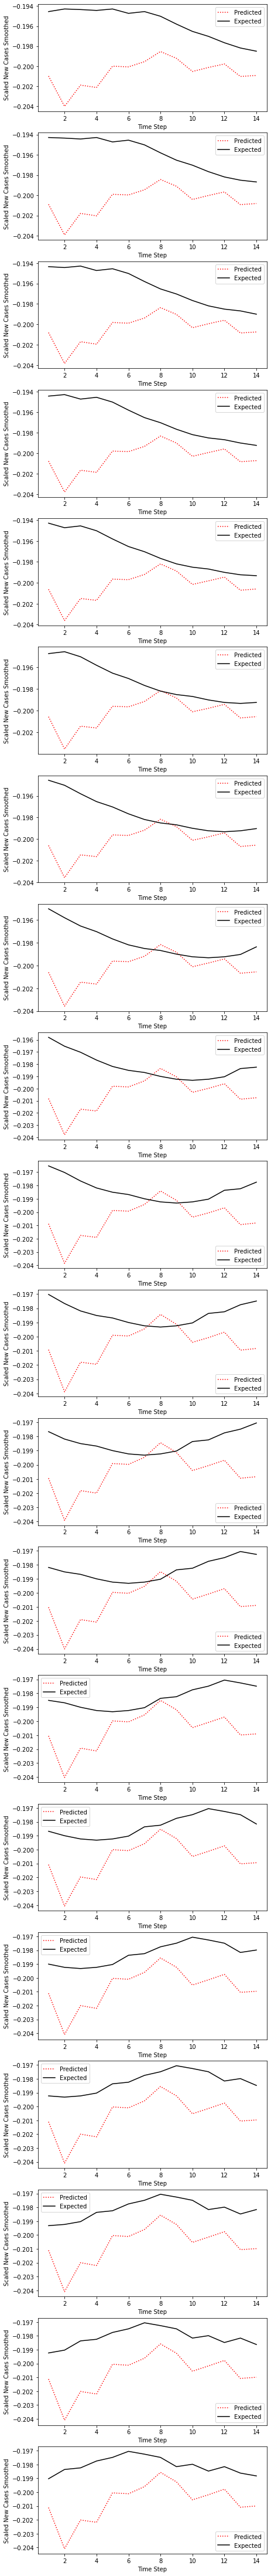

In [26]:
#here we plot the predictions and the real values for each test country
import matplotlib.pyplot as plt
x_axis = np.array([1,2,3,4,5,6,7,8, 9, 10, 11, 12, 13, 14])

#THESE INDICIES ARE HARD CODED
age_seventy_index = 1
new_cases_smoothed_index = 8

indicies = np.arange(new_cases_smoothed_index, NUM_OUTPUT , NUM_FEATURES)

fig, axs = plt.subplots(len(test_country_labels), 1, figsize=(7,80))
plt.setp(axs[:], xlabel='Time Step')
plt.setp(axs[:], ylabel='Scaled New Cases Smoothed')
prev_pred = predicted_labels[0][19][indicies]
prev_ex = test_country_labels[0][19][indicies]
for i in range(len(axs)):
    axs[i].plot(x_axis, predicted_labels[0][i][indicies], c='red', linestyle=':', label='Predicted')
    axs[i].plot(x_axis, test_country_labels[0][i][indicies], c='black', linestyle='solid', label='Expected')
    axs[i].legend()
    assert ~(prev_ex==test_country_labels[0][i][indicies]).all()
    assert ~(prev_pred==predicted_labels[0][i][indicies]).all()
    prev_pred = predicted_labels[0][i][indicies]
    prev_ex = test_country_labels[0][i][indicies]
 

plt.show()


## Plot the prediction of the second values against the real values

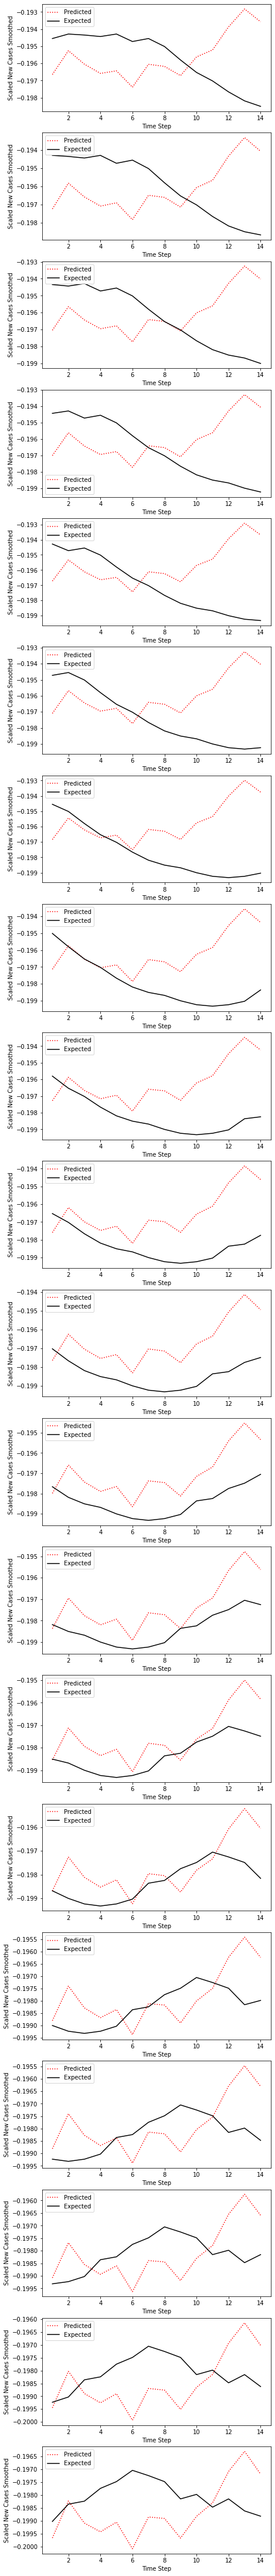

In [27]:
#here we plot the predictions and the real values for each test country

fig, axs = plt.subplots(len(test_country_labels), 1, figsize=(7,80))
plt.setp(axs[:], xlabel='Time Step')
plt.setp(axs[:], ylabel='Scaled New Cases Smoothed')
prev_sec_pred = second_predicted_labels[0][19][indicies]
prev_ex = test_country_labels[0][19][indicies]
for i in range(len(axs)):
    axs[i].plot(x_axis, second_predicted_labels[0][i][indicies], c='red', linestyle=':', label='Predicted')
    axs[i].plot(x_axis, test_country_labels[0][i][indicies], c='black', linestyle='solid', label='Expected')
    axs[i].legend()
    assert ~(prev_ex==test_country_labels[0][i][indicies]).all()
    assert ~(prev_sec_pred==second_predicted_labels[0][i][indicies]).all()
    prev_sec_pred = second_predicted_labels[0][i][indicies]
    prev_ex = test_country_labels[0][i][indicies]
 

plt.show()

## Show model evaluation statistics for the first model

In [28]:
# this is used to evaluate the models we've trained

cnn_model_scores = list()
length = len(test_country_windows)
prev = test_country_labels[0][length - 1]
for country in range(len(test_country_windows)):
    score = cnn_model.evaluate(test_country_windows[country], test_country_labels[country], verbose=0)
    cnn_model_scores.append(score)
    assert ~(test_country_labels[0][country] == prev).all()
    prev = test_country_labels[0][country]
    print(f'Test loss: {score[0]} // Test mean absolute error: {score[1]}')

Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test mean absolute error: 0.00854776706546545
Test loss: 0.00854776706546545 // Test m

## Model evaluation statistics for the second model

In [29]:
second_cnn_model_scores = list()
prev = test_country_labels[0][length - 1]
for country in range(len(test_country_windows)):
    inputs = reshape_input(test_country_windows[country])
    score = second_cnn_model.evaluate(inputs, test_country_labels[country], verbose=0)
    second_cnn_model_scores.append(score)
    assert ~(test_country_labels[0][country] == prev).all()
    prev = test_country_labels[0][country]
    print(f'Test loss: {score[0]} // Test mean absolute error: {score[1]}')

Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004044896457344294 // Test mean absolute error: 0.004044896457344294
Test loss: 0.004

## Setting up Window Generator

In [10]:
import numpy as np

class WindowGenerator():
    def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
        # Store the raw data.
        self.train_df = train_df
        self.val_df = val_df
        self.test_df = test_df

        # Work out the label column indices.
        self.label_columns = label_columns
        if label_columns is not None:
            self.label_columns_indices = {name: i for i, name in
                                        enumerate(label_columns)}
        self.column_indices = {name: i for i, name in
                               enumerate(train_df.columns)}

        # Work out the window parameters.
        self.input_width = input_width
        self.label_width = label_width
        self.shift = shift

        self.total_window_size = input_width + shift

        self.input_slice = slice(0, input_width)
        self.input_indices = np.arange(self.total_window_size)[self.input_slice]

        self.label_start = self.total_window_size - self.label_width
        self.labels_slice = slice(self.label_start, None)
        self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

    def __repr__(self):
        return '\n'.join([
            f'Total window size: {self.total_window_size}',
            f'Input indices: {self.input_indices}',
            f'Label indices: {self.label_indices}',
            f'Label column name(s): {self.label_columns}'])
    
    def split_window(self, features):
        inputs = features[:, self.input_slice, :]
        labels = features[:, self.labels_slice, :]
        if self.label_columns is not None:
            labels = tf.stack(
                [labels[:, :, self.column_indices[name]] for name in self.label_columns],
                axis=-1)

        # Slicing doesn't preserve static shape information, so set the shapes
        # manually. This way the `tf.data.Datasets` are easier to inspect.
        inputs.set_shape([None, self.input_width, None])
        labels.set_shape([None, self.label_width, None])

        return inputs, labels
    #WindowGenerator.split_window = split_window
    
    def plot(self, model=None, plot_col='new_cases', max_subplots=3):
        inputs, labels = self.example
        plt.figure(figsize=(12, 8))
        plot_col_index = self.column_indices[plot_col]
        max_n = min(max_subplots, len(inputs))
        for n in range(max_n):
            plt.subplot(3, 1, n+1)
            plt.ylabel(f'{plot_col} [normed]')
            plt.plot(self.input_indices, inputs[n, :, plot_col_index],
                     label='Inputs', marker='.', zorder=-10)

            if self.label_columns:
                label_col_index = self.label_columns_indices.get(plot_col, None)
            else:
                label_col_index = plot_col_index

            if label_col_index is None:
                continue

            plt.scatter(self.label_indices, labels[n, :, label_col_index],
                        edgecolors='k', label='Labels', c='#2ca02c', s=64)
            if model is not None:
                predictions = model(inputs)
                plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                          marker='X', edgecolors='k', label='Predictions',
                          c='#ff7f0e', s=64)

            if n == 0:
                plt.legend()

        plt.xlabel('Time [h]')
        
    def make_dataset(self, data):
        data = np.array(data, dtype=np.float32)
        ds = tf.keras.preprocessing.timeseries_dataset_from_array(
            data=data,
            targets=None,
            sequence_length=self.total_window_size,
            sequence_stride=1,
            shuffle=True,
            batch_size=32,)

        ds = ds.map(self.split_window)

        return ds
    
    @property
    def train(self):
        ds = []
        for df in self.train_df.groupby('country_id'):
            ds.append(self.make_dataset(self.train_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def val(self):
        ds = []
        for df in self.val_df.groupby('country_id'):
            ds.append(self.make_dataset(self.val_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def test(self):
        ds = []
        for df in self.test_df.groupby('country_id'):
            ds.append(self.make_dataset(self.test_df))
        for i in range(len(ds)):
            if i != 0:
                ds[0] = ds[0].concatenate(ds[i])
        return ds[0]

    @property
    def example(self):
        """Get and cache an example batch of `inputs, labels` for plotting."""
        result = getattr(self, '_example', None)
        if result is None:
            # No example batch was found, so get one from the `.train` dataset
            result = next(iter(self.train))
            # And cache it for next time
            self._example = result
        return result

<ConcatenateDataset shapes: ((None, 6, 47), (None, 1, 1)), types: (tf.float32, tf.float32)>

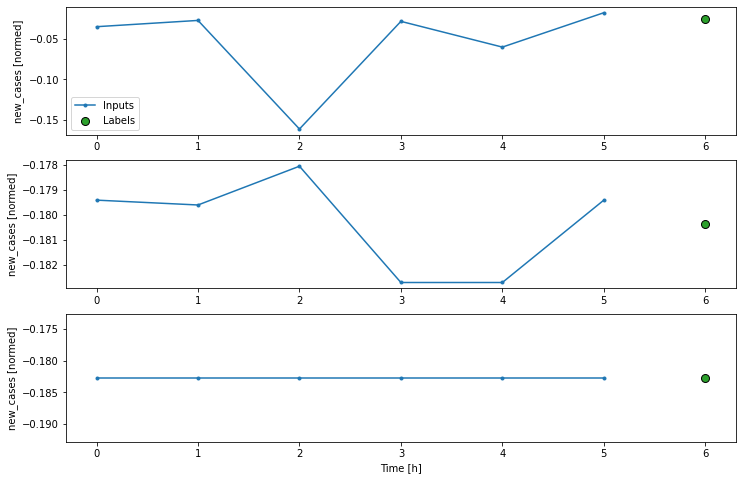

In [11]:
w1 = WindowGenerator(input_width=6, label_width=1, shift=1, label_columns=['new_cases'])
w1.plot()
display(w1.train)

Total window size: 7
Input indices: [0 1 2 3 4 5]
Label indices: [6]
Label column name(s): ['new_cases']


## Convolution Neural Network

In [18]:
num_features = len(train_df.columns)
print(num_features)
print(train_df.columns.values)

47
['date' 'total_cases' 'new_cases' 'new_cases_smoothed' 'total_deaths'
 'new_deaths' 'new_deaths_smoothed' 'total_cases_per_million'
 'new_cases_per_million' 'new_cases_smoothed_per_million'
 'total_deaths_per_million' 'new_deaths_per_million'
 'new_deaths_smoothed_per_million' 'reproduction_rate' 'icu_patients'
 'icu_patients_per_million' 'hosp_patients' 'hosp_patients_per_million'
 'weekly_icu_admissions' 'weekly_icu_admissions_per_million'
 'weekly_hosp_admissions' 'weekly_hosp_admissions_per_million'
 'total_tests' 'new_tests' 'total_tests_per_thousand'
 'new_tests_per_thousand' 'new_tests_smoothed'
 'new_tests_smoothed_per_thousand' 'tests_per_case' 'positive_rate'
 'stringency_index' 'population' 'population_density' 'median_age'
 'aged_65_older' 'aged_70_older' 'gdp_per_capita' 'extreme_poverty'
 'cardiovasc_death_rate' 'diabetes_prevalence' 'female_smokers'
 'male_smokers' 'handwashing_facilities' 'hospital_beds_per_thousand'
 'life_expectancy' 'human_development_index' 'coun

In [32]:
# ITERATIONS=20
ITERATIONS=1
CONV_WIDTH = 7
OUT_STEPS = 7
LABEL_WIDTH = 7
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
#function to compile and fit the different models we call on it
def comp_fit(model, window, patience=3):
  #function is used to optimize model fitting, so if there are no updates, we stop
  stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanAbsoluteError()])
#   model.compile(loss=tf.losses.MeanSquaredError(), optimizer=tf.optimizers.Adam(), metrics=[tf.metrics.MeanSquaredError()])

  history = model.fit(window.train, verbose=1, epochs=ITERATIONS, validation_data=window.val, callbacks=[stop])

  return history
  


#this is where we build the convolution nueral network

#this is from the tensor flow doc
# conv_model = tf.keras.Sequential([
#     tf.keras.layers.Conv1D(filters=32,
#                            kernel_size=(CONV_WIDTH,),
#                            activation='relu'),
#     tf.keras.layers.Dense(units=32, activation='relu'),
#     tf.keras.layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros),
#     tf.keras.layers.Reshape([7, 1])
# ])



In [ ]:
#Other potential model
conv_model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=64,
                           kernel_size=(CONV_WIDTH,),
                           activation='relu'),
#     tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(OUT_STEPS, kernel_initializer=tf.initializers.zeros),
    tf.keras.layers.Reshape([7, 1])
])


# conv_window = WindowGenerator(input_width=CONV_WIDTH, label_width=LABEL_WIDTH, shift=1, label_columns=['new_cases'])

window = WindowGenerator(
    input_width=7, label_width=7, shift=7,
    label_columns=['new_cases'])
window.plot()
window.train

# print("Conv model on `conv_window`")
# print('Input shape:', conv_window.example[0].shape)
# print('Output shape:', conv_model(conv_window.example[0]).shape)

# history = comp_fit(conv_model, conv_window)
history = comp_fit(conv_model, window)

IPython.display.clear_output()
window.plot(conv_model)
# val_performance = {}
# performance = {}
# val_performance['Conv'] = conv_model.evaluate(conv_window.val)
# performance['Conv'] = conv_model.evaluate(conv_window.test, verbose=0)

# wide_conv_window = WindowGenerator(
#     input_width=INPUT_WIDTH,
#     label_width=LABEL_WIDTH,
#     shift=1,
#     label_columns=['new_cases'])
# wide_conv_window.plot(conv_model)

13674/13674 [==============================] - 95s 7ms/step - loss: 0.2546 - mean_squared_error: 0.2546


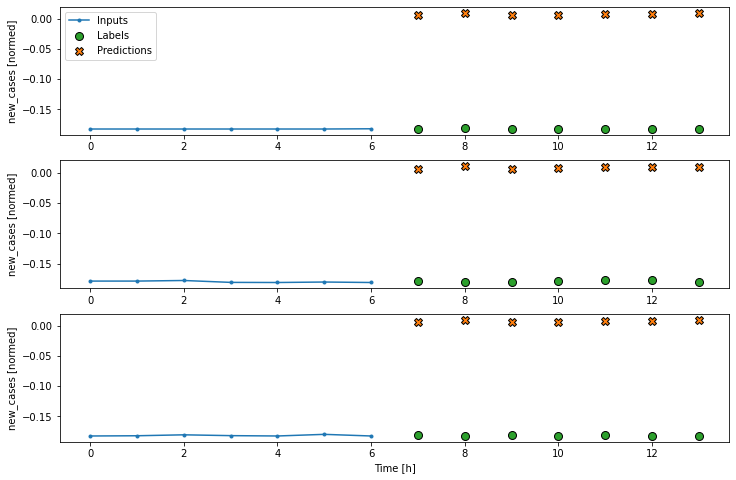

In [28]:
IPython.display.clear_output()
multi_train_performance={}
multi_val_performance = {}
multi_performance={}
multi_train_performance['CNN'] = conv_model.evaluate(window.train)
multi_val_performance['CNN'] = conv_model.evaluate(window.val)
multi_performance['CNN'] = conv_model.evaluate(window.test, verbose=0)
window.plot(conv_model)

13674/13674 [==============================] - 75s 5ms/step - loss: 0.2540 - mean_absolute_error: 0.2430


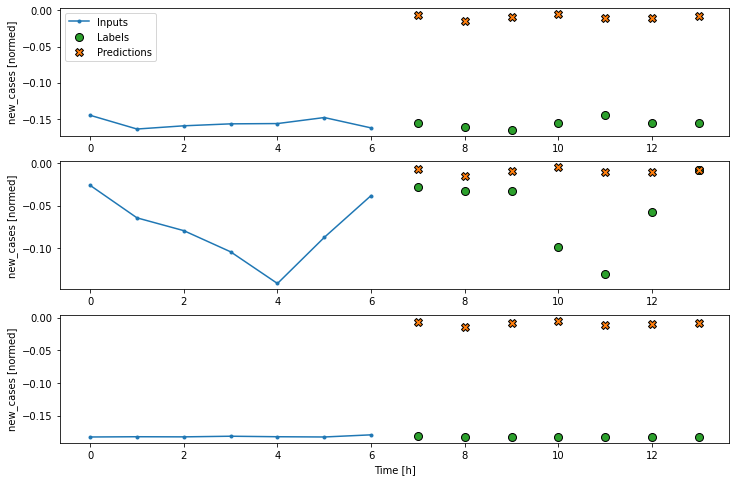

In [34]:
window = WindowGenerator(
    input_width=7, label_width=7, shift=7,
    label_columns=['new_cases'])


multi_lstm_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, lstm_units]
    # Adding more `lstm_units` just overfits more quickly.
    tf.keras.layers.LSTM(32, return_sequences=False),
    # Shape => [batch, out_steps*features]
    tf.keras.layers.Dense(OUT_STEPS*num_features,
                          kernel_initializer=tf.initializers.zeros),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, num_features])
])

history = comp_fit(multi_lstm_model, window)

IPython.display.clear_output()

multi_train_performance['LSTM'] = multi_lstm_model.evaluate(window.train)
multi_val_performance['LSTM'] = multi_lstm_model.evaluate(window.val)
multi_performance['LSTM'] = multi_lstm_model.evaluate(window.test, verbose=0)
window.plot(multi_lstm_model)